In [28]:
from langgraph.graph import StateGraph ,START , END
from typing import TypedDict , Literal
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
import os
from pydantic import BaseModel , Field 


load_dotenv()


google_api_key= os.getenv("GEMINI_API_KEY")


class Sentimentstate(TypedDict):
    review : str
    sentiment : str
    diagnosis : dict
    response : str


In [29]:
class LLM_output(BaseModel):
    sentiment : Literal["positive" , "negative"] = Field(description="sentiment of the review")


model = ChatGoogleGenerativeAI(
     model = "gemini-2.5-flash",
     api_key = google_api_key
)

structured_model = model.with_structured_output(LLM_output)

prompt = f"what is the sentiment of the following : the laptop is bad"













In [30]:
def find_sentiment(state:Sentimentstate):
    prompt = f"what is the sentiment of the following : {state['review']}"


    sentiment = structured_model.invoke(prompt).sentiment


    return {"sentiment" :sentiment }



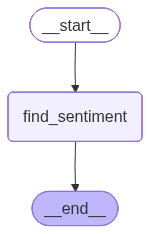

In [31]:
graph = StateGraph(LLM_output)



graph.add_node("find_sentiment" , find_sentiment)

graph.add_edge(START , 'find_sentiment')
graph.add_edge('find_sentiment' , END)



workflow = graph.compile()

workflow